In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First few rows of the dataset:
   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB
None

Summary statistics:
              label
count  83448.000000
mean       0.526196
std        0.499316
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000

Distribution of the target variable:
label
1    43910
0    39538
Name: count, 

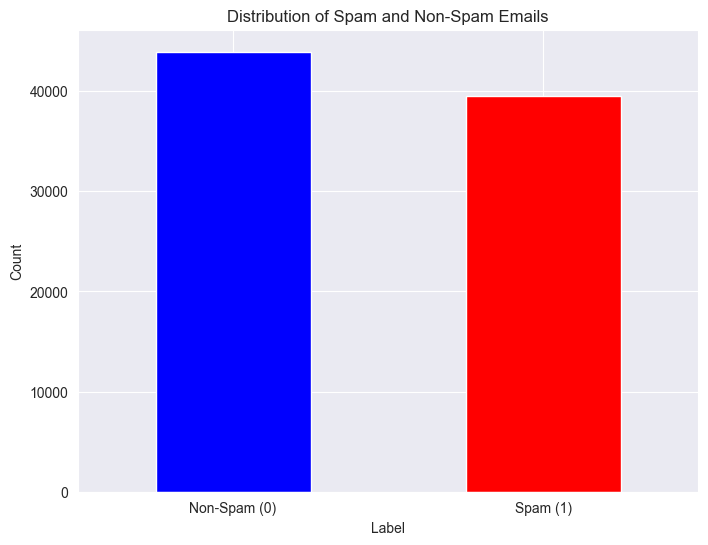

In [6]:
# Specify the path to your CSV file
csv_file_path = "../data/combined_data.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nDataset information:")
print(data.info())

# Display summary statistics
print("\nSummary statistics:")
print(data.describe())

# Display the distribution of the target variable
print("\nDistribution of the target variable:")
print(data['label'].value_counts())

# Plot the distribution of spam emails
plt.figure(figsize=(8, 6))
data['label'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0, ticks=[0, 1], labels=['Non-Spam (0)', 'Spam (1)'])
plt.show()

In [4]:

def get_character_count(text_column):
    """
    Calculate the total character count in a text column.

    Parameters:
    - text_column: Pandas Series, the column containing text data.

    Returns:
    - Pandas Series, the character count for each entry in the text column.
    """
    return text_column.apply(lambda x: len(str(x)))


# df['character_count'] = get_character_count(df['text'])

def get_word_count(text_column):
    """
    Calculate the total word count in a text column.

    Parameters:
    - text_column: Pandas Series, the column containing text data.

    Returns:
    - Pandas Series, the word count for each entry in the text column.
    """
    return text_column.apply(lambda x: len(str(x).split()))


# df['word_count'] = get_word_count(df['text'])

def get_average_word_length(text_column):
    """
    Calculate the average word length in a text column.

    Parameters:
    - text_column: Pandas Series, the column containing text data.

    Returns:
    - Pandas Series, the average word length for each entry in the text column.
    """
    return text_column.apply(
        lambda x: sum(len(word) for word in str(x).split()) / len(str(x).split()) if len(str(x).split()) > 0 else 0)

# df['average_word_length'] = get_average_word_length(df['text'])


In [15]:
import joblib

# Define the available models and their paths
model_paths = {
    'Naive Bayes': '../models/NaiveBayes.pkl',
    'Logistic Regression': '../models/LogisticRegression.pkl',
    'KNN3': '../models/model_KNN3.pkl'
}

vectorizer_paths = {
    'Naive Bayes': '../models/vectorizer.pkl',
    'Logistic Regression': '../models/LRvectorizer.pkl',
    'KNN3': '../models/countVectorizer.pkl'
}
vectorizers = {}
models = {}
for model_name, model_path in model_paths.items():
    try:
        models[model_name] = joblib.load(model_path)
        vectorizers[model_name] = joblib.load(vectorizer_paths[model_name])
    except Exception as e:
        print(f"Error loading model '{model_name}': {str(e)}")

print(models)
print(vectorizers)

{'Naive Bayes': MultinomialNB(), 'Logistic Regression': LogisticRegression(), 'KNN3': KNeighborsClassifier(metric='euclidean', n_neighbors=3)}
{'Naive Bayes': CountVectorizer(), 'Logistic Regression': TfidfVectorizer(stop_words='english'), 'KNN3': CountVectorizer()}


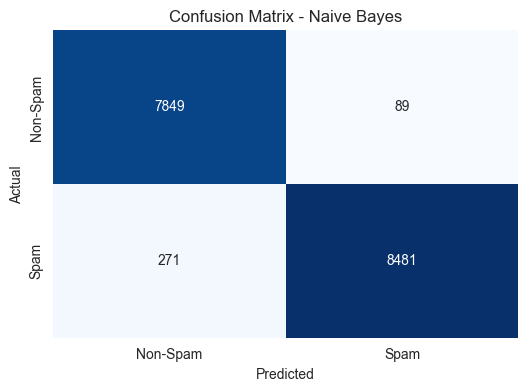

Classification Report - Naive Bayes:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7938
           1       0.99      0.97      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690


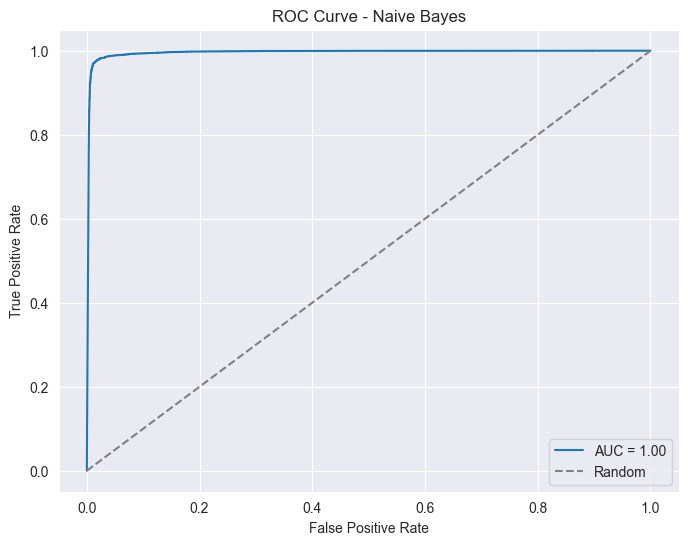

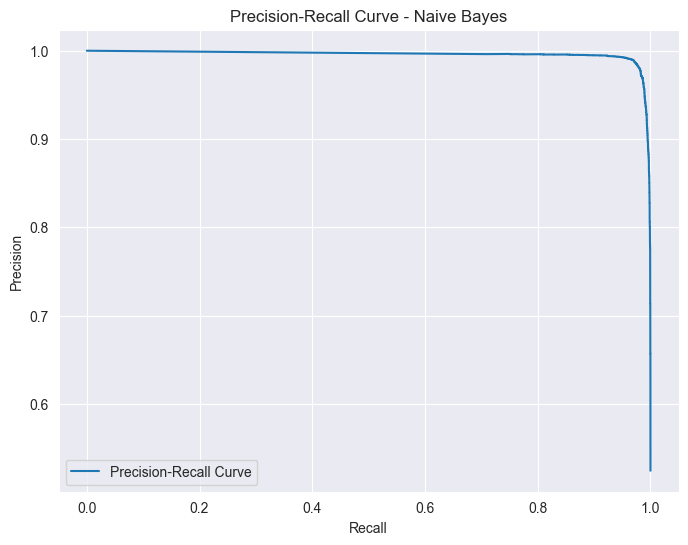

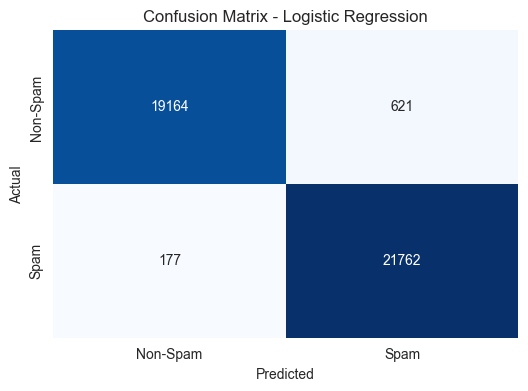

Classification Report - Logistic Regression:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19785
           1       0.97      0.99      0.98     21939

    accuracy                           0.98     41724
   macro avg       0.98      0.98      0.98     41724
weighted avg       0.98      0.98      0.98     41724


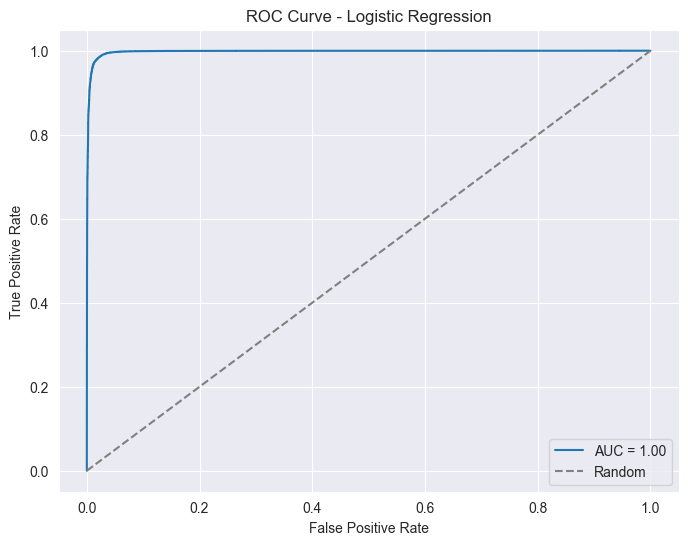

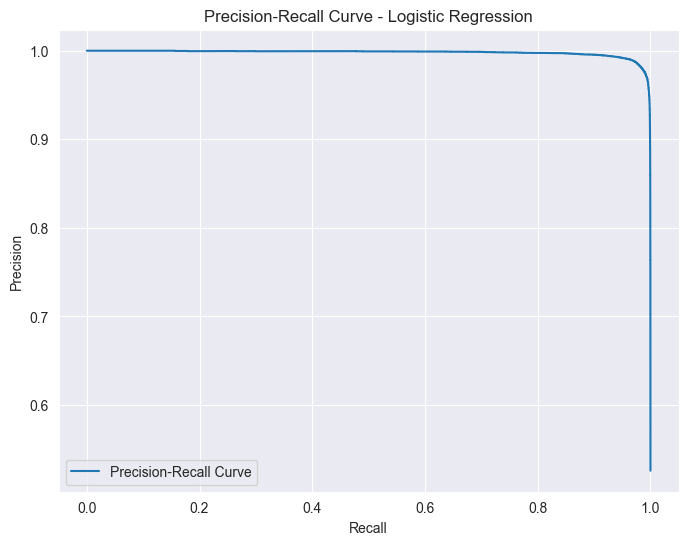

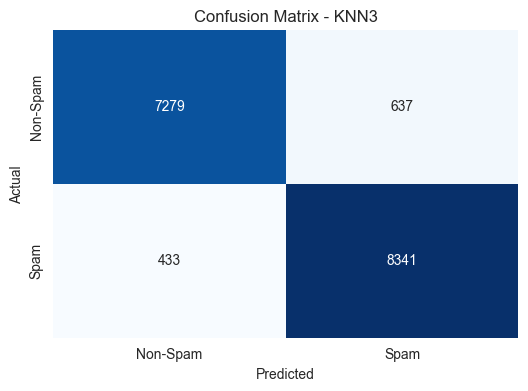

Classification Report - KNN3:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7916
           1       0.93      0.95      0.94      8774

    accuracy                           0.94     16690
   macro avg       0.94      0.94      0.94     16690
weighted avg       0.94      0.94      0.94     16690


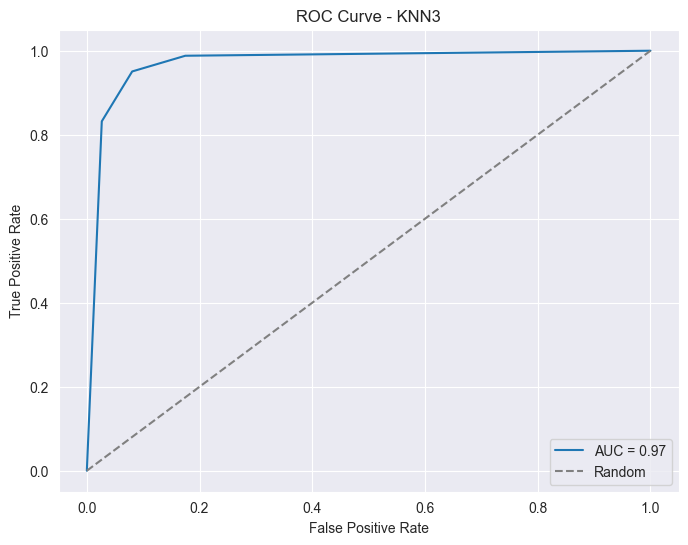

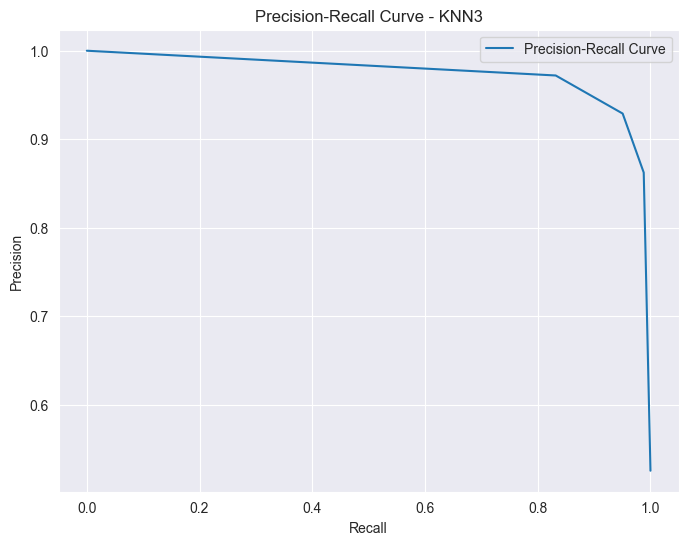

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Define a function to evaluate and visualize the models
def evaluate_models(models, vectorizers, data_path):
    data = pd.read_csv(data_path)
    for model_name, model in models.items():
        if model_name == 'Logistic Regression':
            X = data['text']  # all email texts
            y = data['label']  # spam label
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
            vectorizer = vectorizers[model_name]
            X_train = vectorizer.fit_transform(X_train)
            X_test = vectorizer.transform(X_test)
        elif model_name == 'Naive Bayes':
            data = pd.read_csv('../data/combined_data.csv')
            # Step 1: Text Cleaning
            data['cleaned_text'] = data['text'].apply(lambda x: ' '.join(word for word in x.split()))
            # Step 2: Tokenization
            data['tokenized_text'] = data['cleaned_text'].apply(lambda x: x.split())
            # Step 3: Lowercasing
            data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [word.lower() for word in x])
            # Step 4: Stopword Removal (you may need to download the stopword list)
            from nltk.corpus import stopwords
            stop_words = set(stopwords.words('english'))
            data['tokenized_text'] = data['tokenized_text'].apply(
                lambda x: [word for word in x if word not in stop_words])
            # Step 5: Stemming or Lemmatization (you may need to download a lemmatizer)
            from nltk.stem import WordNetLemmatizer
            lemmatizer = WordNetLemmatizer()
            data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
            # Step 6: Vectorization (choose either CountVectorizer or TfidfVectorizer)
            vectorizer = vectorizers[model_name]
            X = vectorizer.fit_transform(data['tokenized_text'].apply(lambda x: ' '.join(x)))
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)
        else:
            data = pd.read_csv('../data/combined_data.csv')
            X = data['text']    # all email texts
            y = data['label']   # spam label
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
            vectorizer = vectorizers[model_name]
            X_train = vectorizer.fit_transform(X_train)
            X_test = vectorizer.transform(X_test)

        # Make predictions on the test set
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Classification Report
        print(f'Classification Report - {model_name}:\n')
        print(classification_report(y_test, y_pred))

        # ROC Curve and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
        plt.title(f'ROC Curve - {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, label='Precision-Recall Curve')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        plt.show()


# Assuming you have your test data loaded as X_test and y_test
# You should replace these with your actual test data
# Also, make sure that the features in X_test are preprocessed in the same way as the training data

# Call the function to evaluate and visualize the models
evaluate_models(models, vectorizers, '../data/combined_data.csv')
